In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
from tqdm import tqdm 

In [2]:
path='CelebAMask-HQ/CelebA-HQ-img/'
list_img=os.listdir(path)
len(list_img)

30000

In [3]:
def getSketch(img):
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gary=cv2.equalizeHist(gray)
    inverseted_img=255-gray
    cv2.imwrite('inverse.png',inverseted_img)
    sketch=cv2.GaussianBlur(inverseted_img,(21,21),0)
    temp=255-sketch
    result=cv2.divide(gray,temp,scale=256.0)
    return result

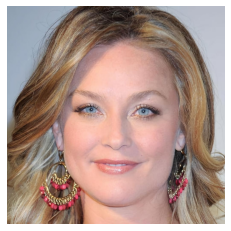

In [4]:
idx=np.random.randint(15)
exp_path='CelebAMask-HQ/CelebA-HQ-img/'+list_img[idx]
exp=cv2.imread(exp_path)
plt.imshow(exp[...,::-1])
plt.axis('off')
plt.savefig('ori.png')

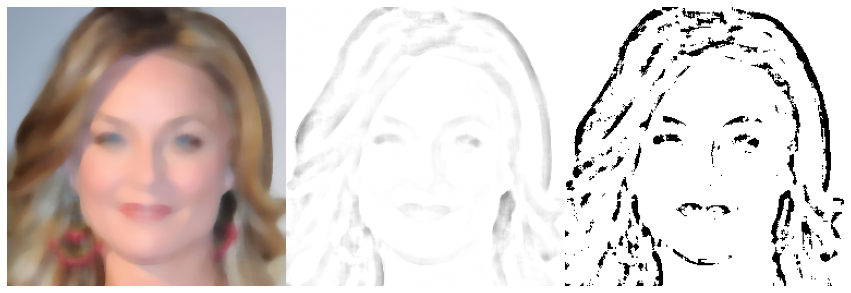

In [5]:
exp=cv2.resize(exp,(256,256))
exp=cv2.medianBlur(exp,11)
cv2.imwrite('blur.png',exp)
gray=cv2.cvtColor(exp,cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray.png',gray)

sketch=getSketch(exp)
cv2.imwrite('sketch.png',sketch)
canny=cv2.adaptiveThreshold(sketch, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)
cv2.imwrite('thresh.png',canny)
sketch=cv2.cvtColor(sketch,cv2.COLOR_GRAY2BGR)
canny=cv2.cvtColor(canny,cv2.COLOR_GRAY2BGR)

img_test=np.concatenate([exp,sketch,canny],axis=1)
plt.figure(figsize=(15,15))
plt.imshow(img_test[...,::-1],cmap='gray')
plt.axis('off')
plt.savefig('sketch_converte.png')

In [6]:
for img_f in tqdm(list_img):
    exp_path='CelebAMask-HQ/CelebA-HQ-img/'+img_f
    img=cv2.imread(exp_path)
    img=cv2.resize(img,(256,256))
    exp=cv2.medianBlur(img,11)

    exp=cv2.resize(exp,(256,256))
    exp=cv2.medianBlur(exp,11)
    gray=cv2.cvtColor(exp,cv2.COLOR_BGR2GRAY)

    sketch=getSketch(exp)
    canny=cv2.adaptiveThreshold(sketch, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)
    sketch=cv2.cvtColor(sketch,cv2.COLOR_GRAY2BGR)
    canny=cv2.cvtColor(canny,cv2.COLOR_GRAY2BGR)

    img_test=np.concatenate([canny,img],axis=1)
    name_save='custom_sketch/'+img_f[:-4]+'_custom.png'
    
    cv2.imwrite(name_save,img_test)

100%|██████████| 30000/30000 [20:29<00:00, 24.40it/s]
